<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [55]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import re
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sc
from datetime import datetime
from src import soporte_nulos as sn

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor


In [40]:
df = pd.read_csv("../datos/autorenew.csv", index_col = 0) 

In [41]:
visualizador =sc.Visualizador(df)
sc.exploracion_datos(df)

El número de filas es 371528 y el número de columnas es 19

----------

En este conjunto de datos tenemos 29 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003478
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640
notRepairedDamage,299468,2,no,263182



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 371528 non-null  object 
 1   seller               371528 non-null  object 
 2   offerType            371528 non-null  object 
 3   price                371528 non-null  int64  
 4   abtest               371528 non-null  object 
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 n

None

**Las conclusiones que podemos sacar de este análisis exploratorio son:**

- Se encontraron 29 valores duplicados que deben eliminarse para evitar sesgos en el modelo.

- Tenemos varias columnas que contienen valores nulos:
-vehicleType          36.003478
-gearbox               5.439429
-model                 5.513447
-fuelType              8.986133
-notRepairedDamage    19.395577
   
Esto supone la necesidad de imputar o manejar estos valores nulos antes de proceder con el modelado.

**Acciones que tendremos que hacer**:

- Gestionar las 29 valores duplicados del conjunto de datos.

- Imputar valores nulos en vehicleType,gearbox,model,fuelType,notRepairedDamage (media, mediana, moda o modelos de imputación).

- Deberemos estandarizar las variables numéricas para manejar la alta variabilidad y posibles outliers.


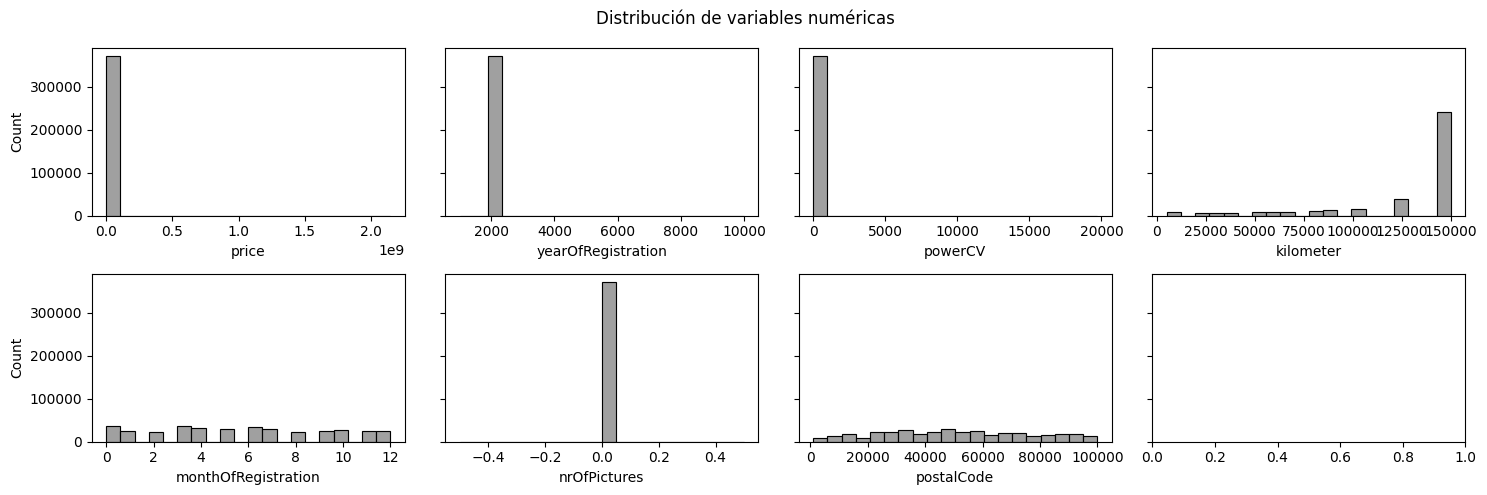

In [42]:
visualizador.plot_numericas()

In [43]:
df_filtrado_categoricas = df.reset_index().drop(["name", "dateCreated", "lastSeen", "dateCrawled", "model"], axis=1)
df_filtrado_categoricas                     #para visualizar las variables categoricas es necesario quitar columnas quue ahora mismo 
                                            #no son necesarias para la exploracion.

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,private,offer,480,test,NaN,1993,manually,0.0,150000,0,petrol,volkswagen,NaN,0,70435
1,private,offer,18300,test,coupe,2011,manually,187.0,125000,5,diesel,audi,yes,0,66954
2,private,offer,9800,test,suv,2004,automatic,161.0,125000,8,diesel,jeep,NaN,0,90480
3,private,offer,1500,test,small car,2001,manually,74.0,150000,6,petrol,volkswagen,no,0,91074
4,private,offer,3600,test,small car,2008,manually,68.0,90000,7,diesel,skoda,no,0,60437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,private,offer,2200,test,NaN,2005,NaN,0.0,20000,1,NaN,sonstige_autos,NaN,0,39576
371524,private,offer,1199,test,convertible,2000,automatic,100.0,125000,3,petrol,smart,no,0,26135
371525,private,offer,9200,test,bus,1996,manually,101.0,150000,3,diesel,volkswagen,no,0,87439
371526,private,offer,3400,test,combi,2002,manually,99.0,150000,6,diesel,volkswagen,NaN,0,40764


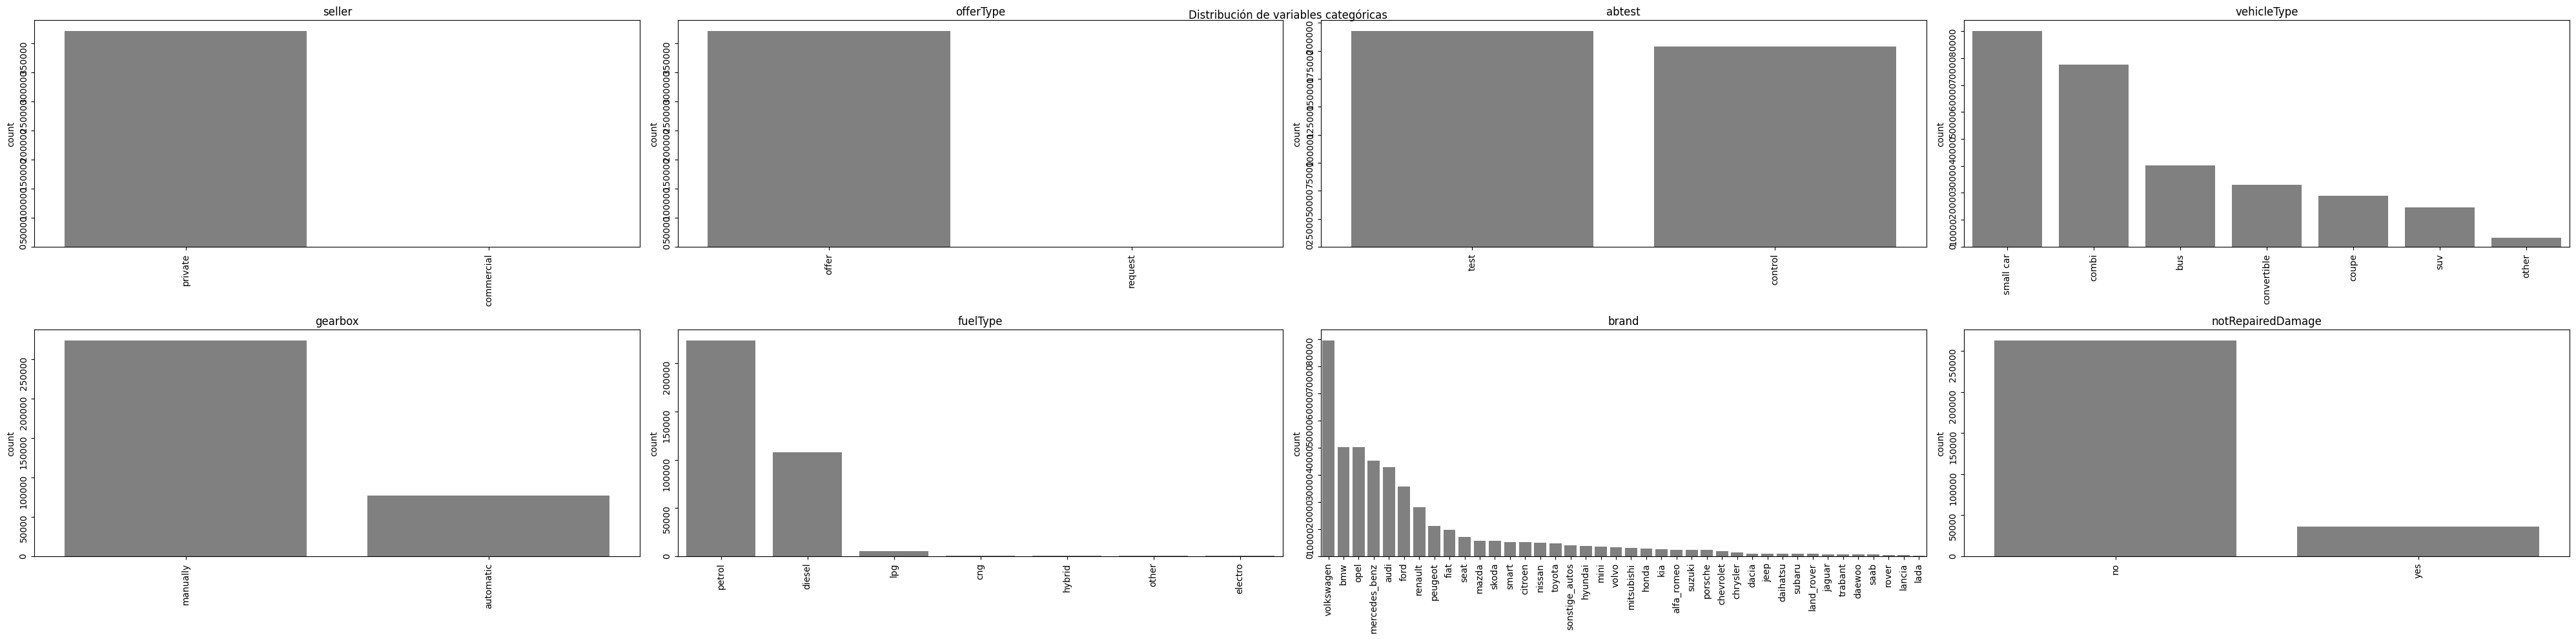

In [44]:
visualizador2 = sc.Visualizador(df_filtrado_categoricas)
visualizador2.plot_categoricas()

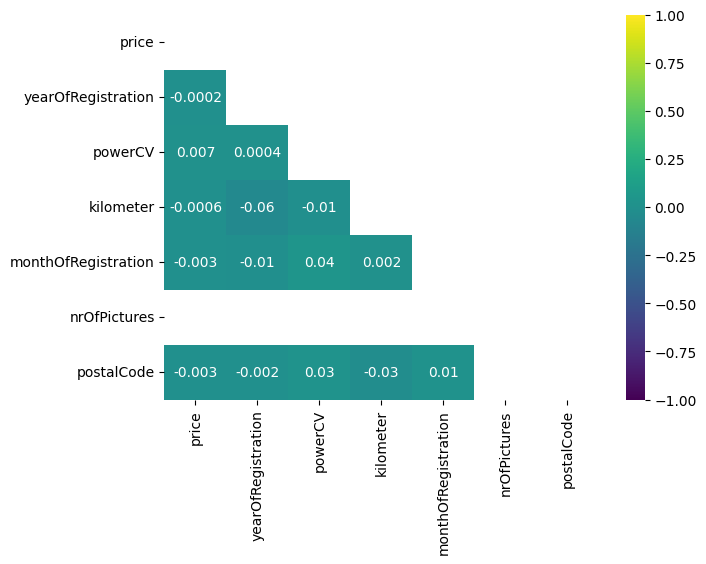

In [45]:
visualizador.correlacion()

Observamos que apenas hay correlacion entre la variable respuesta con las demas.

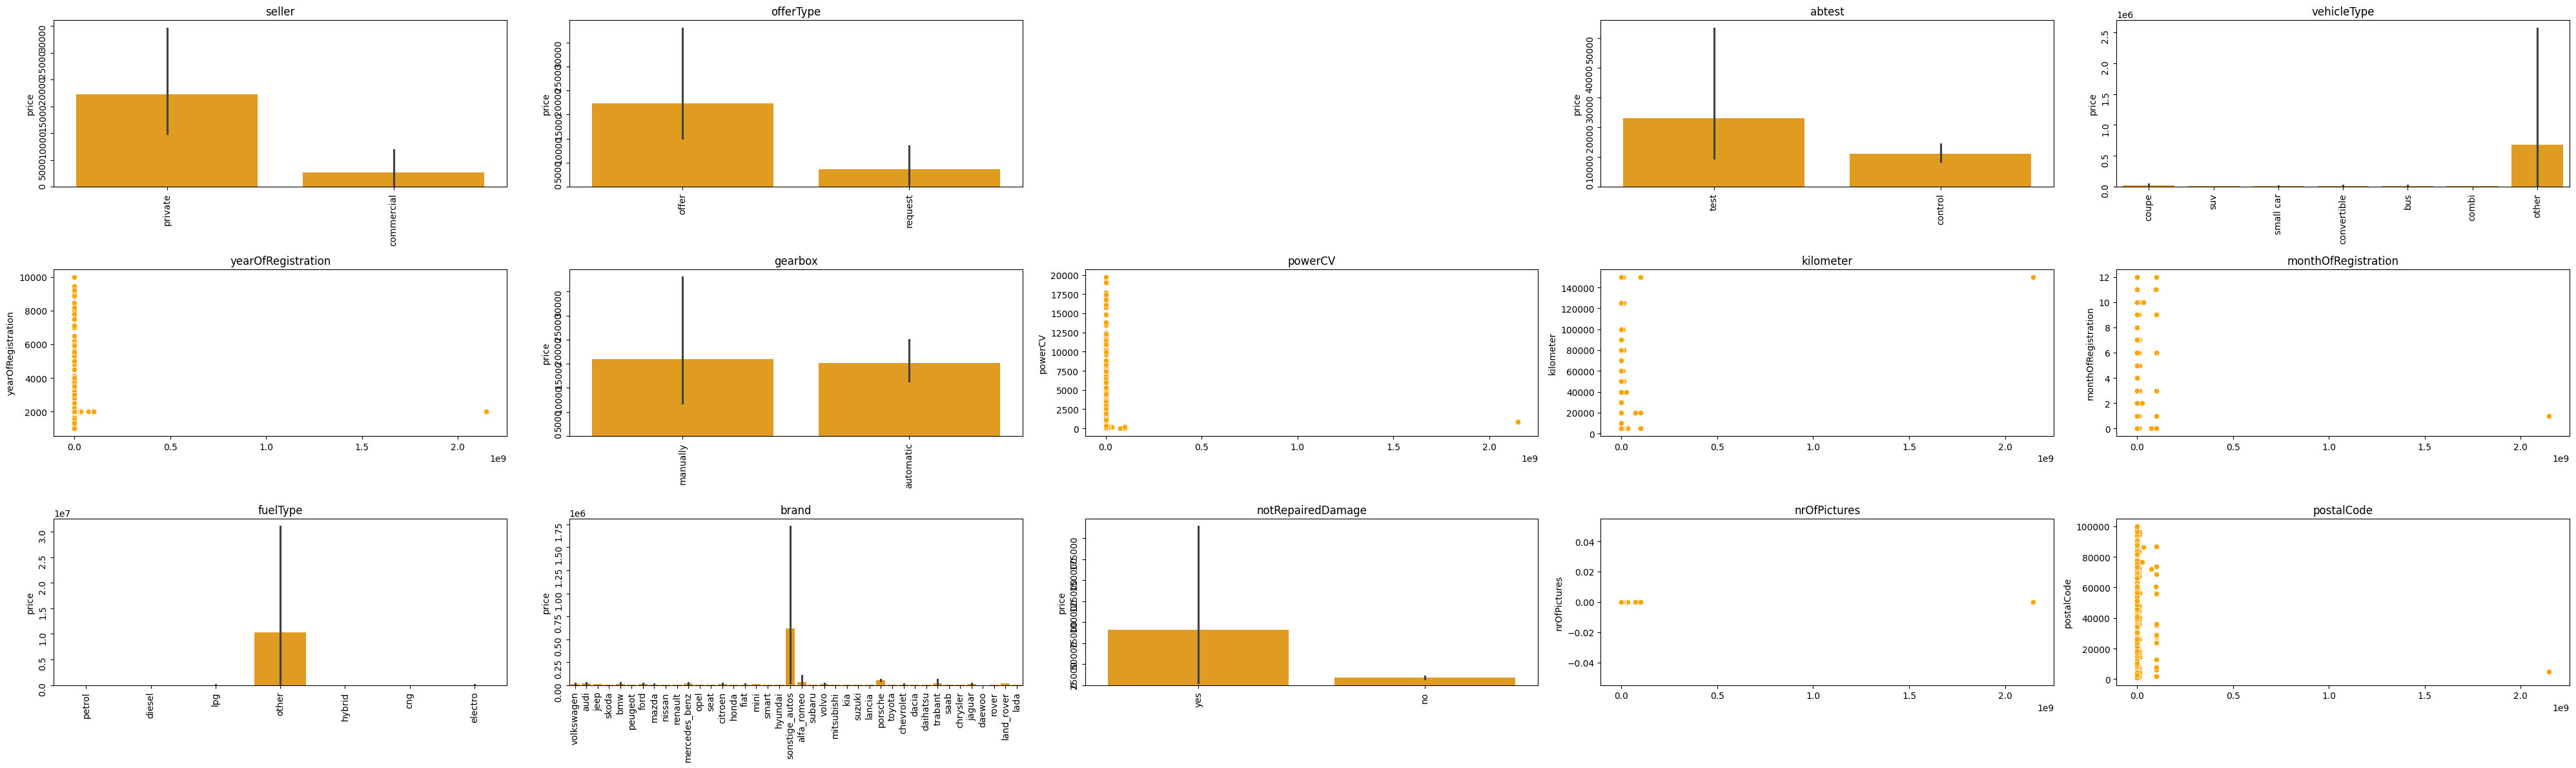

In [46]:
visualizador2.plot_relacion("price", color = "orange")

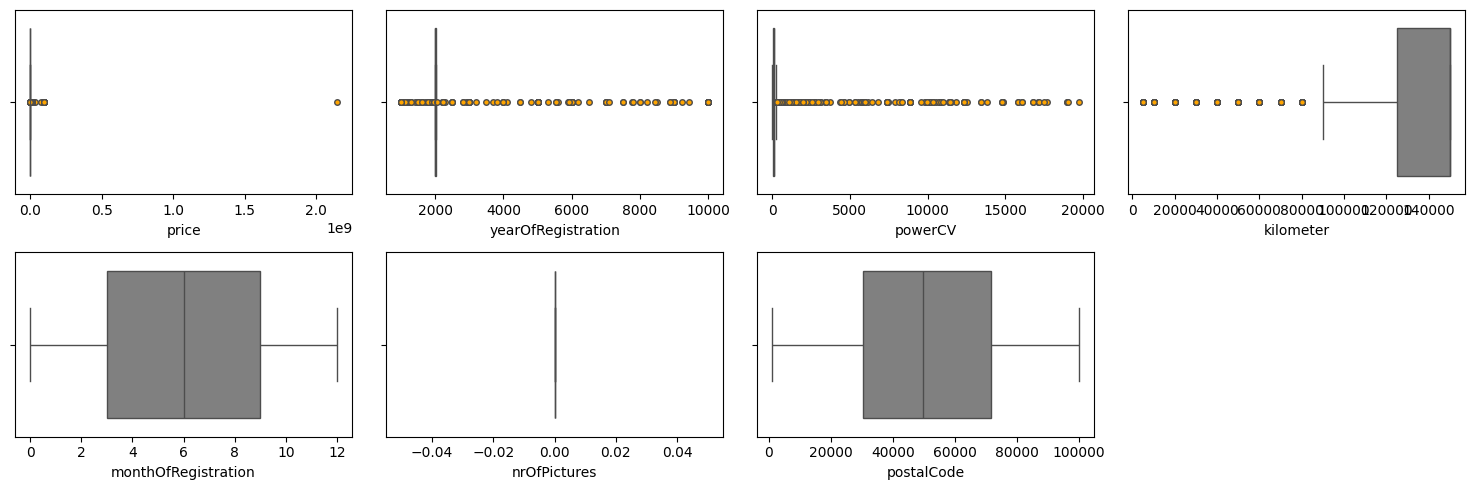

In [47]:
visualizador2.deteccion_outliers()

La concentracion de outliers es mas pronunciada en el precio , los kilometros, el año de registro y los cv de potencia.

In [48]:
from datetime import datetime       

In [49]:
# en nuestro caso, procederemos a eliminar estos valores duplicados, pero debemos tener en cuenta que hay que hacer un análisis detallado de estos valores para entender su origen y gestionarlos correctamente
df.drop_duplicates(inplace = True)
# chequeamos que no quedan duplicados
df.duplicated().sum()

np.int64(0)

In [50]:
df.duplicated().sum()

np.int64(0)

In [53]:
df["dateCreated"]= pd.to_datetime(df["dateCreated"])
df["lastSeen"]= pd.to_datetime(df["lastSeen"])  
df["yearCreated"]=df["dateCreated"].dt.year
df["monthCreated"]=df["dateCreated"].dt.month                    #pasamos las fechas a su formato

In [54]:
df["postalCode"]=df["postalCode"].astype("O")                           #estas variable se pueden observar que son categoricas
                                                                        #tanto en la grafica como en las relcaciones

In [67]:
nulos = sn.GestionNulos(df)
porcentaje= nulos.calcular_porcentaje_nulos()
porcentaje



vehicleType          36.004673
gearbox               5.439584
model                 5.513878
fuelType              8.986027
notRepairedDamage    19.395745
dtype: float64

In [79]:
columnas_cat = nulos.seleccionar_columnas_nulas()
dfcat= pd.DataFrame(columnas_cat)

In [70]:
nulos.mostrar_distribucion_categoricas()

La distribución de las categorías para la columna VEHICLETYPE


vehicleType
small car      0.336562
combi          0.284157
bus            0.127033
convertible    0.096310
coupe          0.079961
suv            0.061857
other          0.014120
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna GEARBOX


gearbox
manually     0.78053
automatic    0.21947
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna MODEL


model
golf               0.085666
andere             0.075196
3er                0.058587
polo               0.037295
corsa              0.035810
                     ...   
serie_2            0.000023
rangerover         0.000017
serie_3            0.000011
serie_1            0.000006
discovery_sport    0.000003
Name: proportion, Length: 251, dtype: float64

........................
La distribución de las categorías para la columna FUELTYPE


fuelType
petrol     0.662024
diesel     0.318639
lpg        0.015903
cng        0.001689
hybrid     0.000822
other      0.000615
electro    0.000308
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna NOTREPAIREDDAMAGE


notRepairedDamage
no     0.878825
yes    0.121175
Name: proportion, dtype: float64

........................
